In [3]:
import os, sys
sys.path.append("../../common/")
from python_tools import *

In [4]:
%matplotlib notebook

In [5]:
hdf5_filename = "/Users/wketchum/MicroBooNE_Data/MCC9/extslide_studies_2/opfilterana.hdf5"
root_filenames = glob.glob("/Users/wketchum/MicroBooNE_Data/MCC9/extslide_studies_2/opfilterana*.root")
#root_filenames = glob.glob("/Users/wketchum/MicroBooNE_Data/MCC9/extslide_studies/opfilterana_ccc0b123-d468-4ab5-953c-1c95ee7da435.root")
read_from_ROOT = False
write_to_hdf5 = False

if not os.path.isfile(hdf5_filename):
    read_from_ROOT = True
    write_to_hdf5 = True

In [6]:
#read_from_ROOT = True
#write_to_hdf5 = False

opf_df = []
mywindows=range(0,9)

if read_from_ROOT:

    file_count = 0
    event_count = 0

    print "Processing %d files" % len(root_filenames)
    for root_filename in root_filenames:
    
        for w in mywindows:
            tree_name = 'opfilterana%d/opfilter_anatree' % w
            opf_tree = uproot.open(root_filename)[tree_name]        
            tmp_opf_df = opf_tree.pandas.df()
            tmp_opf_df = tmp_opf_df.assign(window=np.full(len(tmp_opf_df),w))
            opf_df.append(tmp_opf_df)
            event_count += len(tmp_opf_df)
            
        file_count += 1
        if file_count%10==0:
            print "\tProcessed %d files. %d events processed." % (file_count,event_count)

    opf_df = pd.concat(opf_df)
    opf_df.set_index(["run","event"],inplace=True)
    
    if write_to_hdf5:
        opf_df.to_hdf(hdf5_filename,"opf_df")
else:
    opf_df = pd.read_hdf(hdf5_filename,"opf_df")

Processing 48 files
	Processed 10 files. 8671 events processed.
	Processed 20 files. 14761 events processed.
	Processed 30 files. 21830 events processed.
	Processed 40 files. 29460 events processed.


/Library/Python/2.7/site-packages/pandas/io/pytables.py:279: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->axis0] [items->None]

  f(store)
/Library/Python/2.7/site-packages/pandas/io/pytables.py:279: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->block0_items] [items->None]

  f(store)
/Library/Python/2.7/site-packages/pandas/io/pytables.py:279: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->block1_items] [items->None]

  f(store)


In [7]:
opf_df

time_s    time_ns      pe_beam      pe_veto    maxfrac  \
run  event                                                               
6078 983    1461688015  447903000     0.000000     0.000000   0.000000   
     1350   1461688859  784524000     0.000000     0.000000   0.000000   
6106 171    1461920577  414592000     0.000000     0.000000   0.000000   
     759    1461921930   78859000     0.000000     0.000000   0.000000   
     825    1461922087  750914000    30.233334     0.000000   1.000000   
     828    1461922091  751915000    25.924587  3362.382568   0.615119   
5513 3385   1458455252  882172000   124.275330     0.000000   0.112260   
     3477   1458455458  885456000   248.604187     0.000000   0.236097   
5485 1956   1458278532  262573000     0.000000   133.986740   0.000000   
5425 133    1457946733  422421000    27.801430     0.000000   0.926671   
     210    1457946906  757064000  2125.093750  1735.311035   0.314316   
5384 7428   1457675032  729174000    20.918026   994.029663   0.967188   
5536 2487   1458630345  834829000     0.000000     0.000000   0.000000   
5425 1906   1457950866  428080000   359.394928     0.000000   0.119327   
     1932   1457950923   97519000    24.888296     0.000000   0.977070   
6114 4312   1461999629  938507000     0.000000     0.000000   0.000000   
5783 5407   1459933094  612165000    26.902018   750.205444   0.429361   
     5436   1459933151  942028000     0.000000     0.000000   0.000000   
     5530   1459933348  272590000     0.000000     0.000000   0.000000   
     5607   1459933515  280816000     0.000000     0.000000   0.000000   
     6509   1459935621  614661000   147.759659     0.000000   0.126908   
6080 109    1461701166  517055000     0.000000     0.000000   0.000000   
     247    1461701435  849775000    40.315475    81.396698   1.000000   
     259    1461701460  522802000    52.819675   715.656799   0.357067   
     448    1461701886  854719000     0.000000     0.000000   0.000000   
     476    1461701946  189935000     0.000000     0.000000   0.000000   
     506    1461702014  188230000    20.756622  3365.060791   0.944598   
     532    1461702071  853256000    55.708630     0.000000   0.607176   
     546    1461702098  514961000    38.869236     0.000000   0.548718   
5527 4108   1458577617  791028000     0.000000     0.000000   0.000000   
...                ...        ...          ...          ...        ...   
5808 6089   1460015813  530159000   161.821320     0.000000   0.801965   
6075 2889   1461665767  723995000   456.517578     0.000000   0.117529   
     2948   1461665883  391214000    23.425604  1325.010864   0.996938   
     3148   1461666342  725867000     0.000000     0.000000   0.000000   
     3211   1461666480   54129000     0.000000    33.754837   0.000000   
5804 6600   1459999926  117444000     0.000000     0.000000   0.000000   
     6980   1460000273  117225000     0.000000     0.000000   0.000000   
5154 589    1456438911  257558012  1007.092285     0.000000   0.556810   
5776 270    1459880013  685672000     0.000000    27.153288   0.000000   
     468    1459880462  355135000     0.000000     0.000000   0.000000   
5925 112    1460739683  199627000     0.000000     0.000000   0.000000   
     171    1460739822  531286000    31.282465     0.000000   0.338182   
5164 2490   1456515166  877610024   116.403839     0.000000   0.161282   
5169 7297   1456546317  791275006    72.364235     0.000000   0.431049   
5783 6657   1459935997  607921000    20.168480  1014.161316  11.201927   
5130 5012   1456326166  973892493     0.000000   273.550659   0.000000   
5598 3284   1458987557  181947000  2035.699829     0.000000   0.284710   
5397 1835   1457797413  412007000  1724.281250     0.000000   0.229292   
     1885   1457797521   71618000    27.996574  3150.988770   0.555668   
5719 2504   1459560808  336689000     0.000000     0.000000   0.000000   
     2724   1459561254  335847000    21.627808     0.000000   1.000000   
5880 734    14604711

<IPython.core.display.Javascript object>


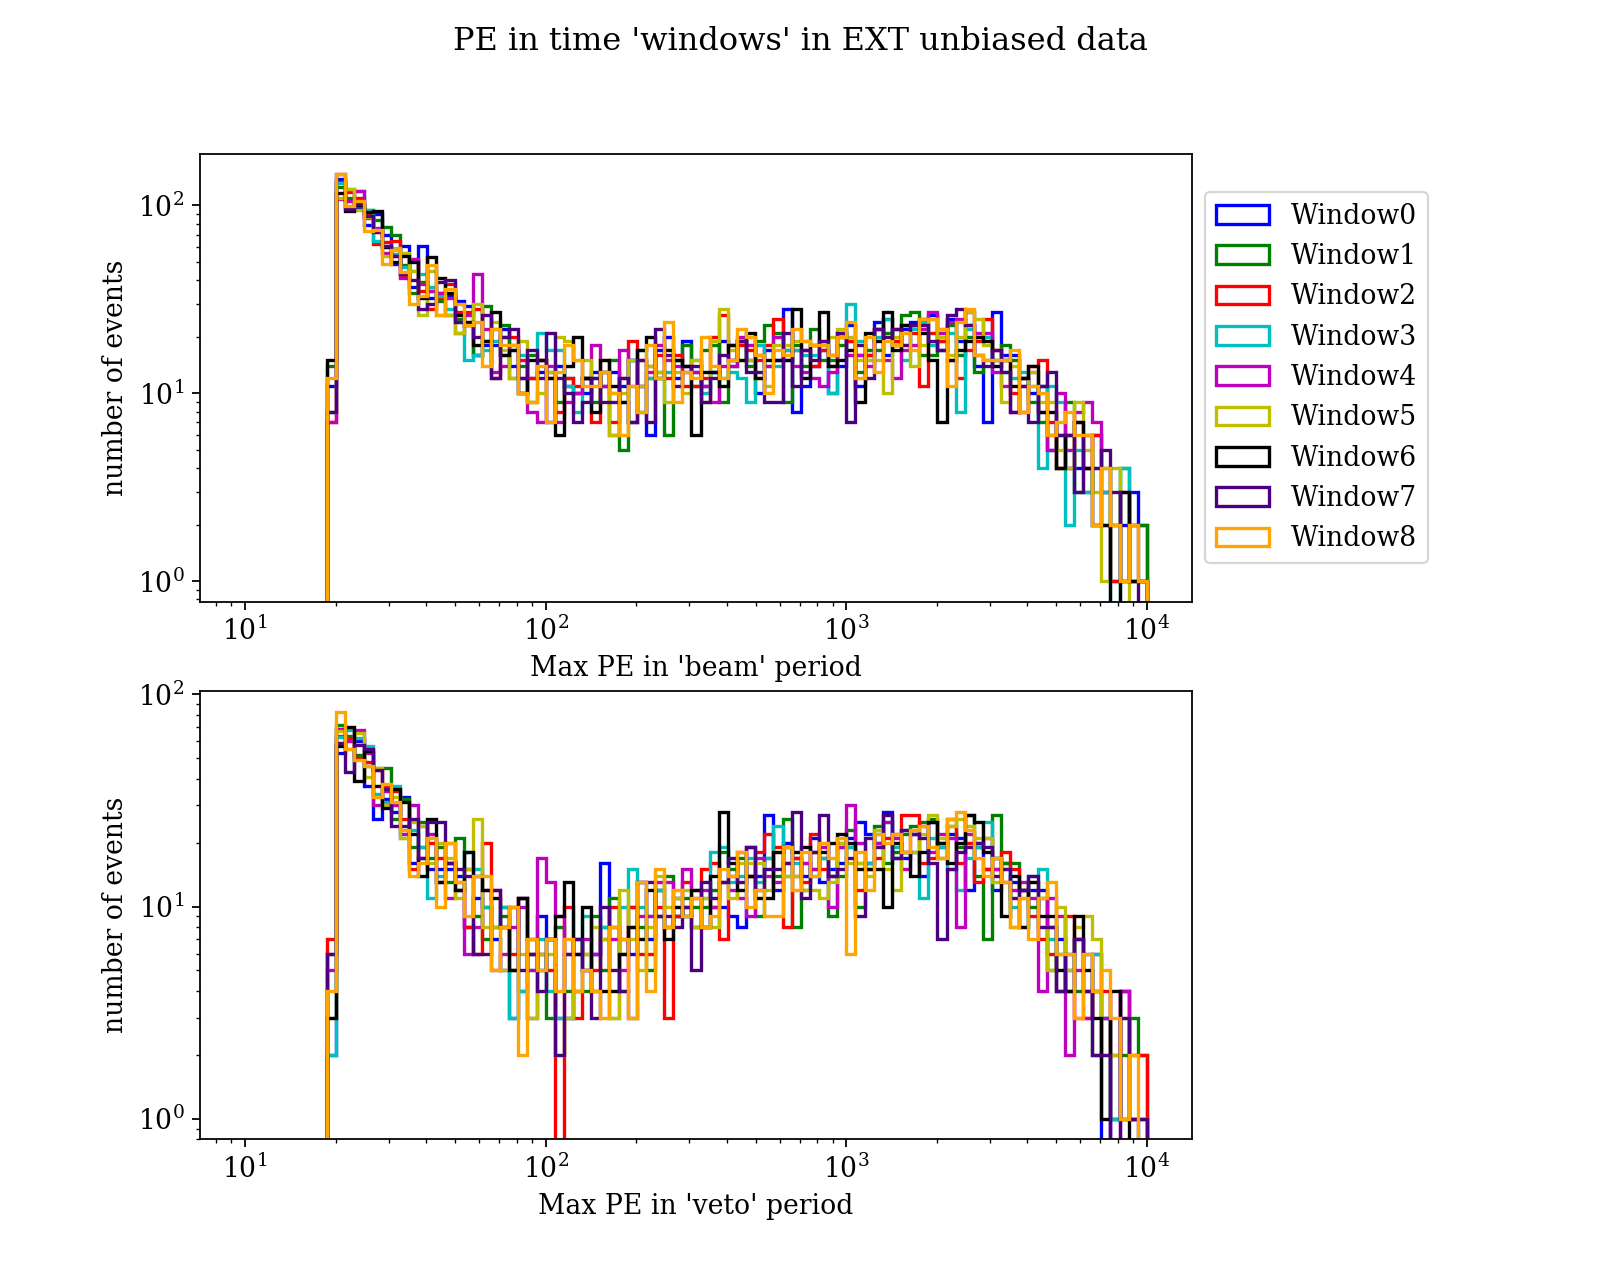

In [18]:
fig,axes = plt.subplots(2)
bins_pe=np.logspace(1,4,100)

for w in mywindows:
    axes[0].hist(opf_df.query("window==%d"%w)["pe_beam"],bins=bins_pe,label="Window%d"%w,**pltops_hist)
    axes[1].hist(opf_df.query("window==%d"%w)["pe_veto"],bins=bins_pe,label="Window%d"%w,**pltops_hist)

axes[0].set_yscale("log")
axes[0].set_xscale("log")
axes[0].set_xlabel("Max PE in 'beam' period")
axes[0].set_ylabel("number of events")

box = axes[0].get_position()
axes[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1].set_yscale("log")
axes[1].set_xscale("log")
axes[1].set_xlabel("Max PE in 'veto' period")
axes[1].set_ylabel("number of events")

box = axes[1].get_position()
axes[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
#axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.suptitle("PE in time 'windows' in EXT unbiased data")

plt.show()
plt.savefig("plots/pe_in_windows.pdf")

<IPython.core.display.Javascript object>


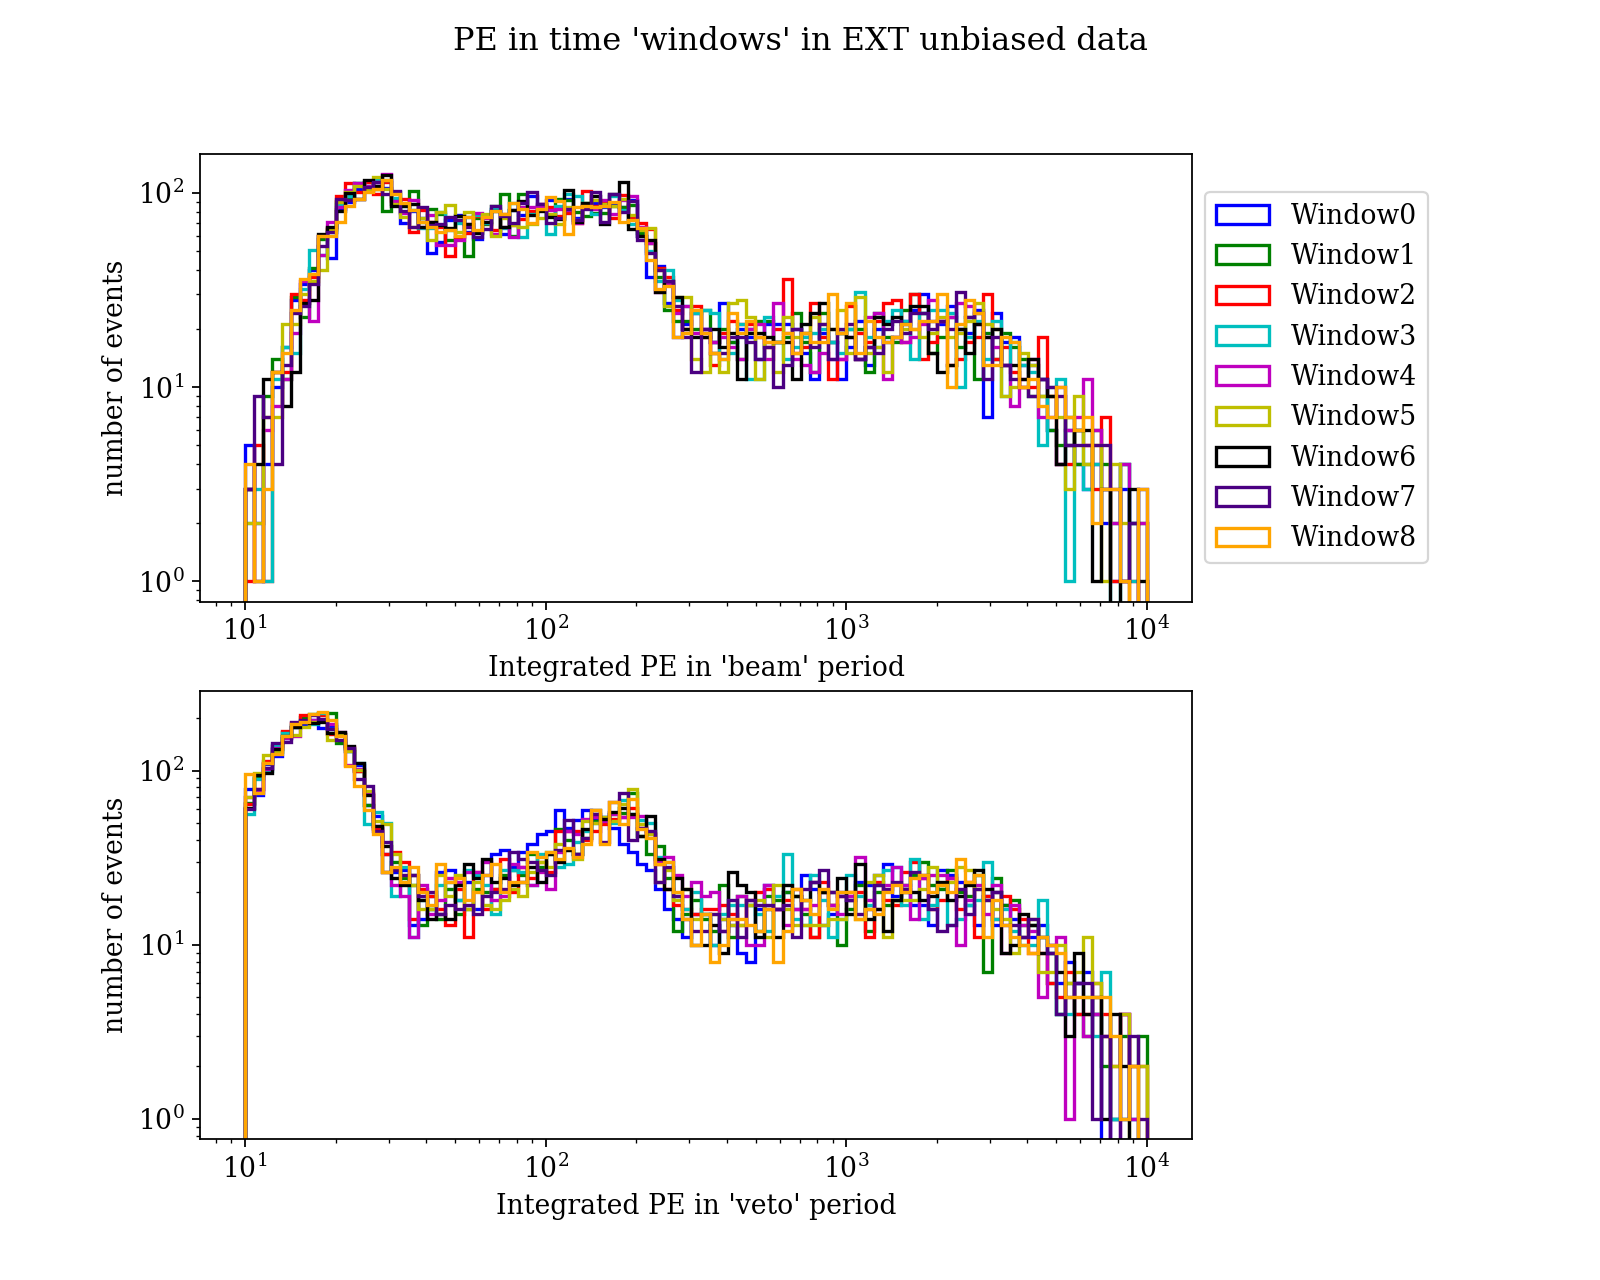

In [85]:
fig,axes = plt.subplots(2)
bins_pe=np.logspace(1,4,100)

for w in mywindows:
    axes[0].hist(opf_df.query("window==%d"%w)["pe_beam_total"],bins=bins_pe,label="Window%d"%w,**pltops_hist)
    axes[1].hist(opf_df.query("window==%d"%w)["pe_veto_total"],bins=bins_pe,label="Window%d"%w,**pltops_hist)

axes[0].set_yscale("log")
axes[0].set_xscale("log")
axes[0].set_xlabel("Integrated PE in 'beam' period")
axes[0].set_ylabel("number of events")

box = axes[0].get_position()
axes[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1].set_yscale("log")
axes[1].set_xscale("log")
axes[1].set_xlabel("Integrated PE in 'veto' period")
axes[1].set_ylabel("number of events")

box = axes[1].get_position()
axes[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
#axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.suptitle("PE in time 'windows' in EXT unbiased data")

plt.show()
plt.savefig("plots/total_pe_in_windows.pdf")

In [20]:
opf_df["pass20"] = ((opf_df["pe_beam"]>20.0) & (opf_df["pe_veto"]<20.0))

In [38]:
#total_events = len(opf_df.groupby(["run","event"]))
total_events = float(182026)

total_pass_trigger = []
eff_trigger = []
eff_trigger_err = []

total_pass_filter = []
eff_filter_per_trigger = []
eff_filter_per_trigger_err = []

eff_filter = []
eff_filter_err = []

for w in mywindows:
    window_cut="window==%d" % w
    total_pass_trigger.append( float(len(opf_df.query(window_cut))) )
    total_pass_filter.append(float(len(opf_df.query(window_cut+" and pass20"))))
    
total_pass_trigger = np.array(total_pass_trigger)
total_pass_filter = np.array(total_pass_filter)

eff_trigger = total_pass_trigger / total_events
eff_trigger_err = np.sqrt(eff_trigger*(1-eff_trigger)/total_events)

eff_filter_per_trigger = total_pass_filter / total_pass_trigger
eff_filter_per_trigger_err = np.sqrt(eff_filter_per_trigger*(1-eff_filter_per_trigger)/total_pass_trigger)

eff_filter = total_pass_filter / total_events
eff_filter_err = np.sqrt(eff_filter*(1-eff_filter)/total_events)

for w in mywindows:
    print "Total efficiency for window %d : %d / %d = %1.4f +/- %1.4f" % (w,total_pass_filter[w],total_events,eff_filter[w],eff_filter_err[w])
    print "\tswtrigger efficiency for window %d : %d / %d = %1.4f +/- %1.4f" % (w,total_pass_trigger[w],total_events,eff_trigger[w],eff_trigger_err[w])
    print "\tfilter per trigger efficiency for window %d : %d / %d = %1.4f +/- %1.4f" % (w,total_pass_filter[w],total_pass_trigger[w],eff_filter_per_trigger[w],eff_filter_per_trigger_err[w])
    print "\n"

Total efficiency for window 0 : 1227 / 182026 = 0.0067 +/- 0.0002
	swtrigger efficiency for window 0 : 3958 / 182026 = 0.0217 +/- 0.0003
	filter per trigger efficiency for window 0 : 1227 / 3958 = 0.3100 +/- 0.0074


Total efficiency for window 1 : 1211 / 182026 = 0.0067 +/- 0.0002
	swtrigger efficiency for window 1 : 4020 / 182026 = 0.0221 +/- 0.0003
	filter per trigger efficiency for window 1 : 1211 / 4020 = 0.3012 +/- 0.0072


Total efficiency for window 2 : 1199 / 182026 = 0.0066 +/- 0.0002
	swtrigger efficiency for window 2 : 4003 / 182026 = 0.0220 +/- 0.0003
	filter per trigger efficiency for window 2 : 1199 / 4003 = 0.2995 +/- 0.0072


Total efficiency for window 3 : 1166 / 182026 = 0.0064 +/- 0.0002
	swtrigger efficiency for window 3 : 4016 / 182026 = 0.0221 +/- 0.0003
	filter per trigger efficiency for window 3 : 1166 / 4016 = 0.2903 +/- 0.0072


Total efficiency for window 4 : 1126 / 182026 = 0.0062 +/- 0.0002
	swtrigger efficiency for window 4 : 3938 / 182026 = 0.0216 +/- 0.

<IPython.core.display.Javascript object>


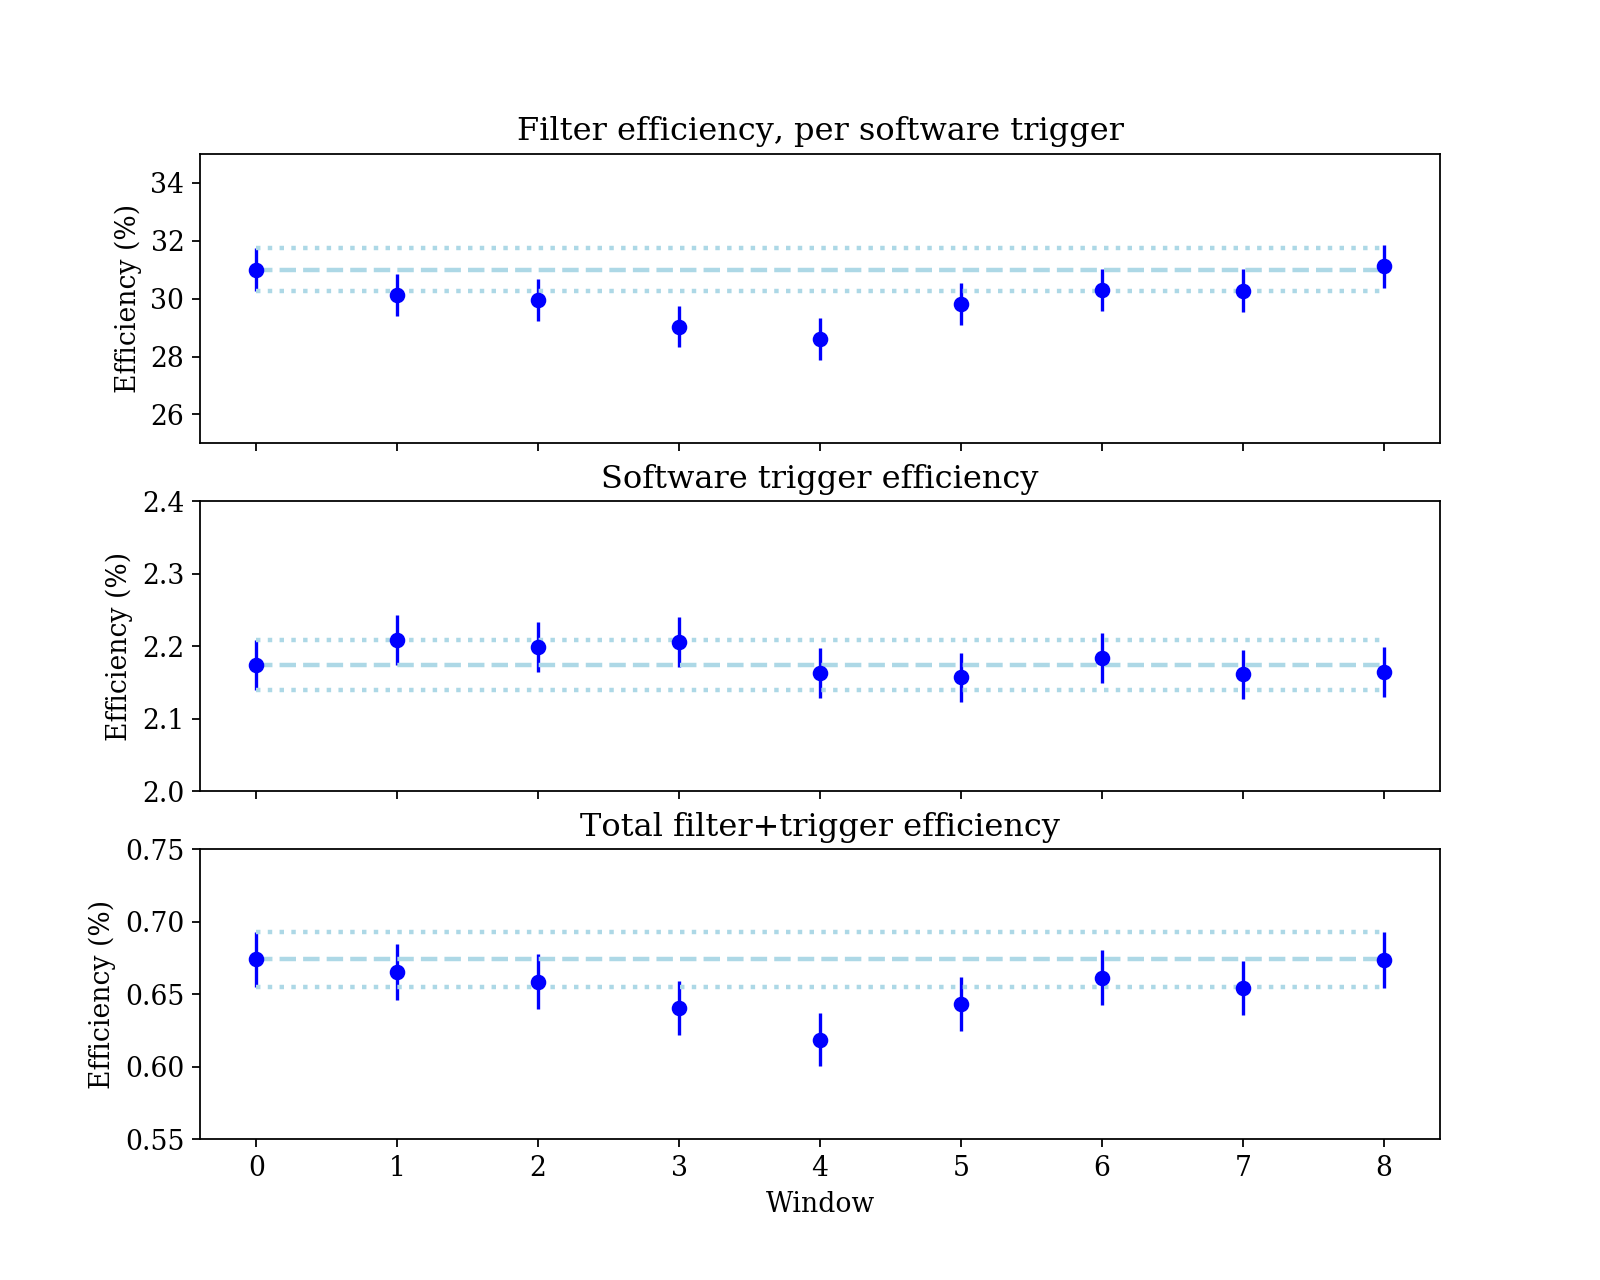

In [84]:
fig, ax = plt.subplots(3,1,sharex=True)
#ax = axs[0,0]


y=eff_filter_per_trigger*100.
yerr=eff_filter_per_trigger_err*100.
ax[0].plot([mywindows[0], mywindows[-1]], [y[0], y[0]], color='lightblue', linestyle='--', linewidth=2)
ax[0].plot([mywindows[0], mywindows[-1]], [(y[0]+yerr[0]), (y[0]+yerr[0])], color='lightblue', linestyle=':', linewidth=2)
ax[0].plot([mywindows[0], mywindows[-1]], [(y[0]-yerr[0]), (y[0]-yerr[0])], color='lightblue', linestyle=':', linewidth=2)
ax[0].errorbar(mywindows, eff_filter_per_trigger*100., yerr=eff_filter_per_trigger_err*100., fmt='o')
ax[0].set_ylabel("Efficiency (%)")
ax[0].set_ylim((25,35))
ax[0].set_title("Filter efficiency, per software trigger")

y=eff_trigger*100.
yerr=eff_trigger_err*100.
ax[1].plot([mywindows[0], mywindows[-1]], [y[0], y[0]], color='lightblue', linestyle='--', linewidth=2)
ax[1].plot([mywindows[0], mywindows[-1]], [(y[0]+yerr[0]), (y[0]+yerr[0])], color='lightblue', linestyle=':', linewidth=2)
ax[1].plot([mywindows[0], mywindows[-1]], [(y[0]-yerr[0]), (y[0]-yerr[0])], color='lightblue', linestyle=':', linewidth=2)
ax[1].errorbar(mywindows, eff_trigger*100., yerr=eff_trigger_err*100., fmt='o')
ax[1].set_ylabel("Efficiency (%)")
ax[1].set_ylim((2,2.4))
ax[1].set_title("Software trigger efficiency")

y=eff_filter*100.
yerr=eff_filter_err*100.
ax[2].plot([mywindows[0], mywindows[-1]], [y[0], y[0]], color='lightblue', linestyle='--', linewidth=2)
ax[2].plot([mywindows[0], mywindows[-1]], [(y[0]+yerr[0]), (y[0]+yerr[0])], color='lightblue', linestyle=':', linewidth=2)
ax[2].plot([mywindows[0], mywindows[-1]], [(y[0]-yerr[0]), (y[0]-yerr[0])], color='lightblue', linestyle=':', linewidth=2)
ax[2].errorbar(mywindows, eff_filter*100., yerr=eff_filter_err*100., fmt='o')
ax[2].set_ylabel("Efficiency (%)")
ax[2].set_ylim((0.55,0.75))
ax[2].set_title("Total filter+trigger efficiency")

ax[2].set_xlabel("Window")
#axes[1].set_yscale("log")
plt.show()
plt.savefig("plots/efficiency_per_window.pdf")

In [22]:
query_list = []
running_cut = "True"
for w in mywindows:
    cut="(window==%d and pass20)" % w
    query_list.append("%s and %s"%(cut,running_cut))
    running_cut = "%s and not%s" % (running_cut,cut)

n_events_list = []
for q in query_list:
    #print q
    #print len(opf_df.query(q))
    n_events_list.append(len(opf_df.query(q)))
    
print n_events_list
new_events = 0
for n in n_events_list[1:-1]:
    new_events += n
    
print n_events_list[0]/float(total_events)
print new_events/float(total_events)

print new_events/float(n_events_list[0])



[1227, 1211, 1199, 1166, 1126, 1171, 1204, 1191, 1226]
0.00674079527101
0.0454220825596
6.73838630807
